# ANALIZA PODATKOV SPLETNE STRANI "ARCHIVE OF OUR OWN"

## Archive Of Our Own

Archive Of Our Own, bolje poznana pod imenom "AO3" je neprofitna, nekomercialna spletna stran, ki služi kot arhiv "fanficov". To so (ponavadi) krajše fiktivne zgodbe, ki so jih napisali ljubitelji neke knjige, filma, glasbene skupine... Zgodbe vsebujejo like, dogodke ali kraje, vzete iz izbranega področja, v angleščini imenovanega "fandom". Angleška beseda je nastala po vzorcu besede "kingdom", v slovenščini pa prevoda nimamo. Vseeno lahko besedo "fandom" razlagamo kot subkulturo ali skupnost, katere člani so ljubitelji iste stvari.

Na spletni strani lahko uporabniki zastonj pišejo in objavljajo svoje zgodbe, prav tako pa lahko berejo, komentirajo, všečkajo... ostala objavljena dela. Ta so najprej razvrščena po različnih področjih kot so Knjige in literatura, Filmi in serije, Videoigre, Znane osebnosti..., nato pa še podrobneje na specifične knjige, filme, igre... Za vse zgodbe, ki ne ustrezajo nobenemu specifičnemu področju, pa je namenjena kategorija "Uncategorised fandoms", kjer so večinoma zbrana čisto originalna dela.

## Kratek opis naloge

Najprej bomo analizirali število del in specifičnih "fandomov" glede na širše kategorije. Pri tem izpustimo prej omenjeno kategorijo "Uncategorised Fandoms", saj ne vsebuje podatkov o dejanskih področij ampak zgolj originalna dela. Nato si bomo podrobneje pogledali 1000 najbolj priljubljenih del na temo knjžne serije Harry Potter, kar je trenutno tudi najbolj priljubljen "fandom" v kategoriji "Knjige in literatura".

## Priprava na analizo
Preden začnemo, si pripravimo okolje.

In [33]:
import pandas as pd
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt


Uvozimo podatke o "fandomih" in delih o Harryju Potterju.

In [7]:
pot_dela='podatki/dela.csv'
pot_fandomi='podatki/fandomi.csv'
dela=pd.read_csv(pot_dela, index_col="naslov")
fandomi=pd.read_csv(pot_fandomi)

## Analiza fandomov

Poglejmo si najprej 10 najbolj priljubljenih fandomov. Dober kriterij za to je število del, ki so bila objavljena za to področje.

In [37]:
fandomi.sort_values("število del", ascending=False, inplace=True)
fandomi=fandomi.reset_index(drop=True)
fandomi.index=fandomi.index+1
naj_10=fandomi.head(10)
naj_10

,vrsta fandoma,fandom,število del
1,Celebrities & Real People,Real Person Fiction,764133
2,Music & Bands,K-pop,709110
3,Cartoons & Comics & Graphic Novels,Marvel,647300
4,TV Shows,Marvel,647300
5,Movies,Marvel,647300
6,Video Games,Harry Potter - J. K. Rowling,536968
7,Movies,Harry Potter - J. K. Rowling,536968
8,Books & Literature,Harry Potter - J. K. Rowling,536968
9,TV Shows,Marvel Cinematic Universe,520848
10,Movies,Marvel Cinematic Universe,520848


In [38]:
# glejmo brez vrste fandoma
brez_vrste=fandomi[['fandom','število del']].copy()
brez_vrste.head(10)

,fandom,število del
1,Real Person Fiction,764133
2,K-pop,709110
3,Marvel,647300
4,Marvel,647300
5,Marvel,647300
6,Harry Potter - J. K. Rowling,536968
7,Harry Potter - J. K. Rowling,536968
8,Harry Potter - J. K. Rowling,536968
9,Marvel Cinematic Universe,520848
10,Marvel Cinematic Universe,520848


Nekateri "fandomi" so zaradi same vsebine lahko razvrščeni pod več področij. Zgoraj vidimo, da se recimo Marvel pojavi kar trikrat, saj spada pod filme, serije in tudi stripe. Da bi tako širokemu pojmu določili le eno izmed teh kategorij bi bilo ne samo krivično, temveč bi tudi v nadaljevnaju vodilo do morda ne najbolj zanesljivih rezultatov. V naprej se je zato dobro zavedati, da različne kategorije niso nujno disjunktne množice fandomov. To bo močno pomagalo pri razumevanju naslednjih grafov, v katerih so prikazani deleži, ki jih posamezne kategorije zastopajo.

Deleže lahko izračunamo na dva načina: štejemo lahko število fandomov ali število vseh del znotraj kategorije. 

In [52]:
vrste=fandomi[['vrsta fandoma','število del']].copy()
vrste=vrste.groupby('vrsta fandoma').sum('število del')
vrste.sort_values('število del', ascending= False, inplace=True)
vrste.reset_index()
vsa_dela= vrste['število del'].sum()
vrste['delež (v %)']=((vrste['število del']/vsa_dela)*100).round(1)

In [53]:
vrste

,število del,delež (v %)
vrsta fandoma,,
TV Shows,6189047,17.4
Movies,5881281,16.5
Cartoons & Comics & Graphic Novels,4996659,14.0
Video Games,4603081,12.9
Books & Literature,3653909,10.3
Anime & Manga,2957645,8.3
Other Media,2598883,7.3
Celebrities & Real People,2269490,6.4
Music & Bands,2223988,6.3


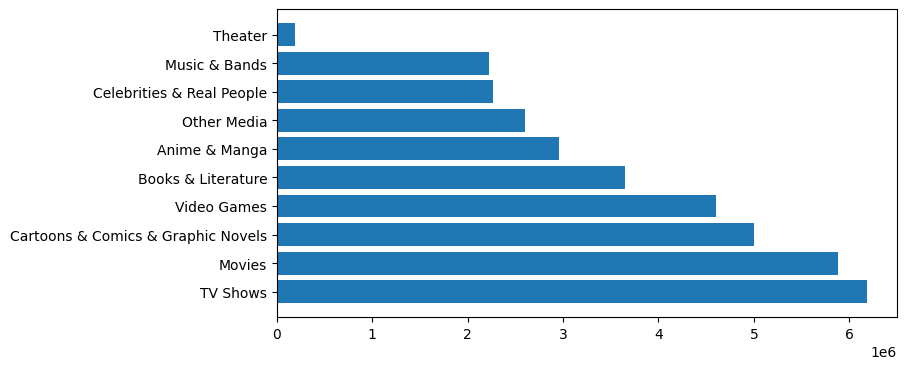

In [46]:
plt.figure(figsize=(8,4))
bars=plt.barh(vrste.index, vrste['število del'])

<Axes: >

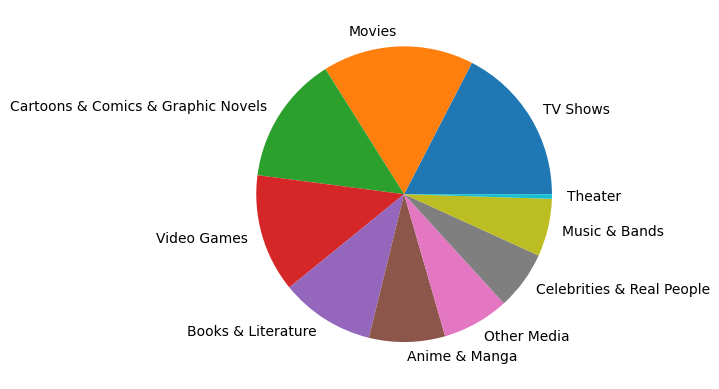

In [50]:

vrste.plot(kind='pie', y='delež (v %)', ylabel='',legend=False)

In [65]:
st_fandomi=fandomi['vrsta fandoma'].value_counts()
st_fandomi=pd.DataFrame(st_fandomi)
st_fandomi.sort_values('count', inplace=True, ascending=False )
st_fandomi=st_fandomi.reset_index()
st_fandomi.rename(columns={'vrsta fandoma':'kategorija', 'count': 'število fandomov'}, inplace=True)
st_fandomi.index=st_fandomi.index+1
st_fandomi

,kategorija,število fandomov
1,Movies,12594
2,Books & Literature,12484
3,TV Shows,10394
4,Video Games,7332
5,Music & Bands,7066
6,Cartoons & Comics & Graphic Novels,5506
7,Anime & Manga,4746
8,Other Media,4459
9,Celebrities & Real People,2290
10,Theater,1551


<Axes: >

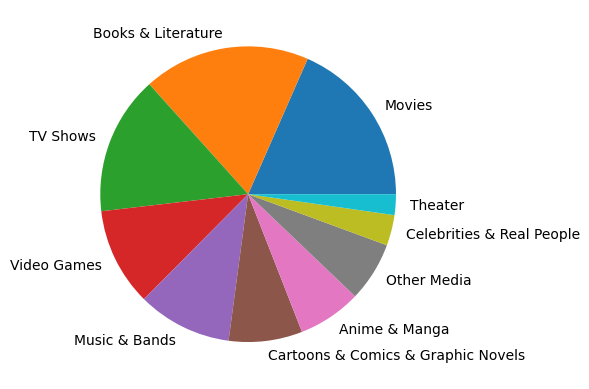

In [69]:
st_fandomi.plot(kind='pie', y='število fandomov', labels=st_fandomi['kategorija'],ylabel='', legend=False)

Zanima nas količina del napisanih za različne fandome, ker pa je lahko to karkoli med 1 in več kot 700.000, je dobro število del zaokrožiti vsaj na 100.

In [ ]:
#funkcija, ki zaokroži števila del na tk 100 in pol kok je kerih fandomov
#doda nov stolpec
#pogledamo pol graf i suppose
def zaokroži_100(x):
    return round(x, -2)
dela_zaokroženo=fandomi['število del'].apply(zaokroži_100)
fandomi['dela zaokroženo']=dela_zaokroženo
fandomi.groupby('dela zaokroženo').size()


dela zaokroženo
0         58085
100        4350
200        1436
300         728
400         444
          ...  
520800        3
537000        3
647300        3
709100        1
764100        1
Length: 355, dtype: int64

opazimo, da je fandomov z do 50 del občutno več kot vseh ostalih

In [ ]:
#pogledamo do 100 posebi?
#pogledamo berz tistih ko majo pod 50 pa tk kolko jih je nad tk 1000, če je sploh smiselno gledat

fandomi[fandomi['dela zaokroženo']>1000]

,vrsta fandoma,število del,dela zaokroženo
fandom,,,
Real Person Fiction,Celebrities & Real People,764133,764100
K-pop,Music & Bands,709110,709100
Marvel,Cartoons & Comics & Graphic Novels,647300,647300
Marvel,TV Shows,647300,647300
Marvel,Movies,647300,647300
...,...,...,...
SIGNALIS (Video Game),Video Games,1056,1100
Sky: Children of the Light (Video Game),Video Games,1056,1100
Tales of the Abyss (Video Game),Video Games,1052,1100


<Axes: xlabel='dela zaokroženo'>

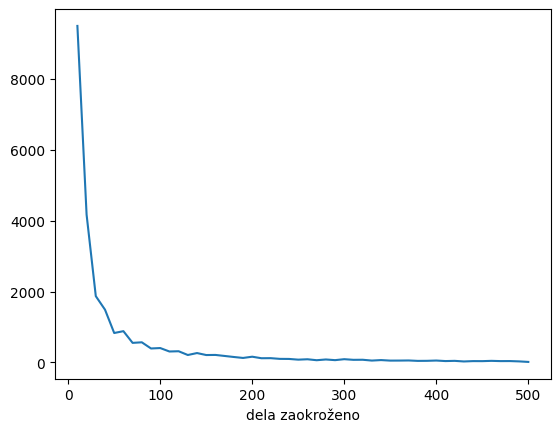

In [ ]:
# tisti, ki majo do 500 myb? jih damo po deset zaokrožit pa napisat en lineplot
# uglavnem bomo še vidli ane
manjši_fandomi=fandomi[fandomi['število del']<=500].copy()
def zaokroži_10(x):
    return round(x,-1)
dela_zaokroženo_10=manjši_fandomi['število del'].apply(zaokroži_10)
manjši_fandomi['dela zaokroženo']=dela_zaokroženo_10
manjši_fandomi.sort_values('število del', inplace=True, ascending=False)
manjši_fandomi[manjši_fandomi['dela zaokroženo']>0].groupby('dela zaokroženo').size().plot()

In [ ]:
dela.groupby('jezik').size()

jezik
English    959
Español      1
dtype: int64

In [ ]:
dela.sort_values('kudos', inplace=True, ascending=False )
dela

,mesec,leto,jezik,število besed,komentarji,kudos,bookmarks,hits,napisana poglavja,vsa poglavja,avtor
naslov,,,,,,,,,,,
All the Young Dudes,11,2018,English,526969,44483,276686,49328,18155528,188,188,MsKingBean89
Draco Malfoy and the Mortifying Ordeal of Being in Love,4,2022,English,199548,12685,88988,27896,4706421,36,36,isthisselfcare
Evitative,2,2020,English,222453,8402,80849,21858,2692668,29,29,Vichan
Lily's Boy,1,2022,English,746386,12759,77780,22788,4529719,109,109,SomewheresSword
Then Comes a Mist and a Weeping Rain,8,2011,English,21139,1313,76335,14320,928244,1,1,Faith Wood (faithwood)
...,...,...,...,...,...,...,...,...,...,...,...
A Beautiful Lie,11,2021,English,65840,1669,8113,2512,185536,14,ni podatka,Panis_fluvium
blood will tell but often it tells too much,8,2016,English,2489,278,8110,2468,62807,1,1,elumish
Finest in Fairford,8,2012,English,4997,180,8109,1049,68413,1,1,bluepeony
